In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('spam.csv',encoding='latin')

In [4]:
df.sample(5)

,v1,v2
2368,ham,If you r @ home then come down within 5 min
4608,ham,Y de asking like this.
3803,ham,"No dude, its not fake..my frnds got money, tht..."
3101,ham,Even if he my friend he is a priest call him now
1908,ham,Hello beautiful r u ok? I've kinda ad a row wi...


In [5]:
df.shape

(5572, 2)

1.data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.rename(columns={'v1':'target','v2':'message'},inplace=True)

In [8]:
df.sample(5)

,target,message
623,ham,"sorry, no, have got few things to do. may be i..."
5426,ham,Oh yeah! And my diet just flew out the window
4699,spam,WIN: We have a winner! Mr. T. Foley won an iPo...
3576,ham,Yeah confirmed for you staying at that weekend
1869,ham,Mom wants to know where you at


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['target']=encoder.fit_transform(df['target'])

In [11]:
df.sample(5)

,target,message
831,0,Hi mate its RV did u hav a nice hol just a mes...
4002,0,somewhere out there beneath the pale moon ligh...
2667,0,Why de. You looking good only:-)..
3951,0,Me hungry buy some food good lei... But mum n ...
4276,0,I'm glad. You are following your dreams.


In [12]:
df.isnull().sum()

target     0
message    0
dtype: int64

In [13]:
df.duplicated().sum()

401

In [14]:
df=df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5171, 2)

2.EDA

In [17]:
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar then Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

target
0    4518
1     653
Name: count, dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

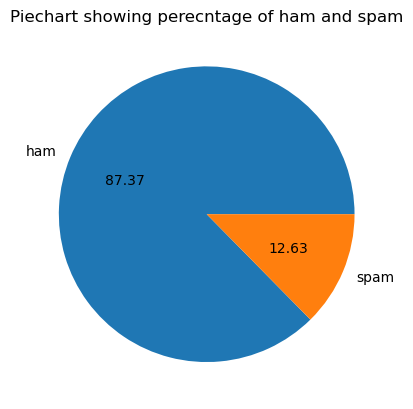

In [20]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.title("Piechart showing perecntage of ham and spam")
plt.show()

In [21]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [24]:
df['num_charecters']=df['message'].apply(len)

In [25]:
df.sample(5)

,target,message,num_charecters
1881,0,Ok.. ÌÏ finishing soon?,23
3534,0,I'm at home. Please call,24
998,0,Then Ì_ wait 4 me at bus stop aft ur lect lar....,107
2461,0,Anything lar...,15
3528,1,Xmas & New Years Eve tickets are now on sale f...,157


In [26]:
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.sample(5)

,target,message,num_charecters,num_words
2317,0,Waqt se pehle or naseeb se zyada kisi ko kuch ...,134,29
2138,0,K still are you loving me.,26,7
3457,0,Have your lunch and come quickly and open the ...,52,12
2147,0,Ok. Can be later showing around 8-8:30 if you ...,154,36
2209,0,"Hmm well, night night",22,5


In [28]:
df['num_sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.sample(5)

,target,message,num_charecters,num_words,num_sentences
2599,0,"Gosh that , what a pain. Spose I better come t...",50,13,2
3696,1,You are a winner you have been specially selec...,159,30,3
2869,1,YOUR CHANCE TO BE ON A REALITY FANTASY SHOW ca...,152,34,1
4013,0,"Sorry, I can't text &amp; drive coherently, se...",61,16,1
1160,0,You sure your neighbors didnt pick it up,40,8,1


In [30]:
df[['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,5171.000000,5171.000000,5171.000000
mean,79.591568,18.606652,1.974280
std,58.591487,13.424824,1.466029
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#ham messages
df[df['target']==0][['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,4518.000000,4518.000000,4518.000000
mean,71.131253,17.287074,1.829128
std,56.861084,13.618450,1.404481
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#spam messages
df[df['target']==1][['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,653.000000,653.000000,653.00000
mean,138.127106,27.736600,2.97856
std,29.910358,6.976813,1.49010
min,13.000000,2.000000,1.00000
25%,132.000000,25.000000,2.00000
50%,149.000000,29.000000,3.00000
75%,157.000000,32.000000,4.00000
max,224.000000,46.000000,9.00000


<Axes: xlabel='num_charecters', ylabel='Count'>

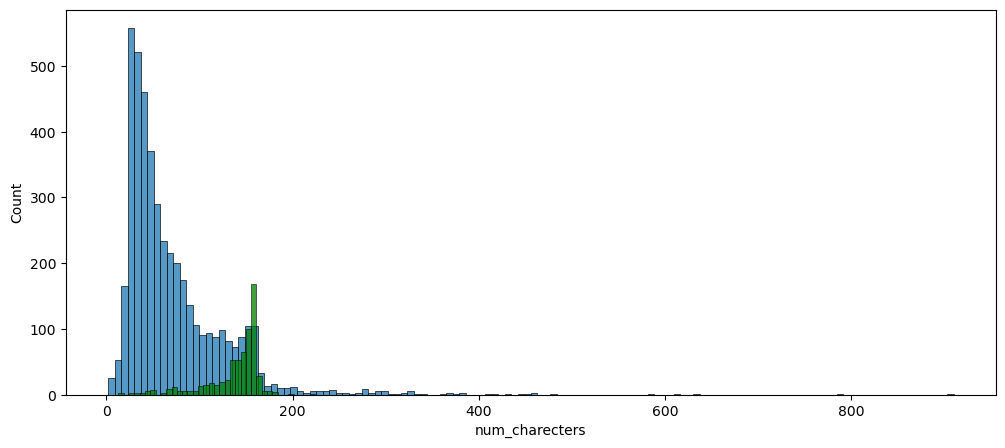

In [33]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_charecters'])
sns.histplot(df[df['target']==1]['num_charecters'],color='green')

<Axes: xlabel='num_words', ylabel='Count'>

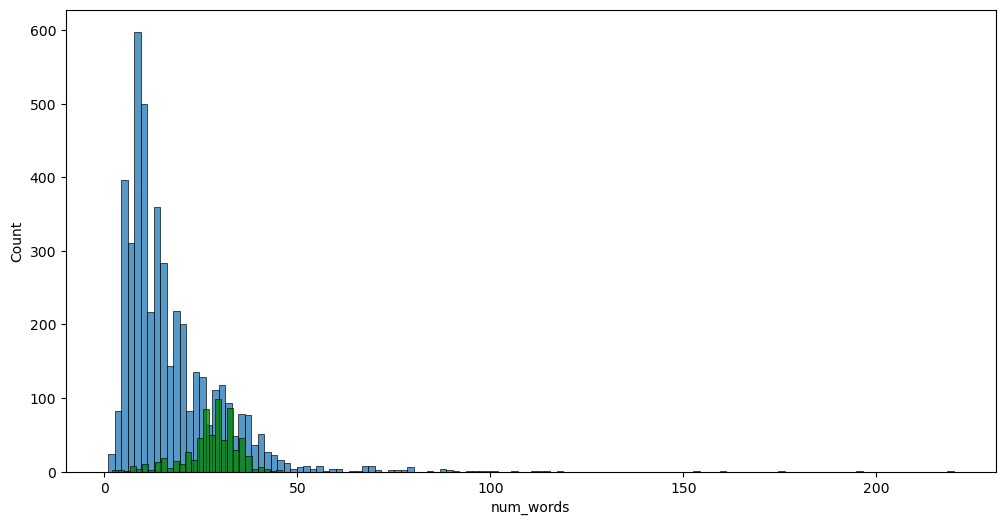

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='green')

<Axes: xlabel='num_sentences', ylabel='Count'>

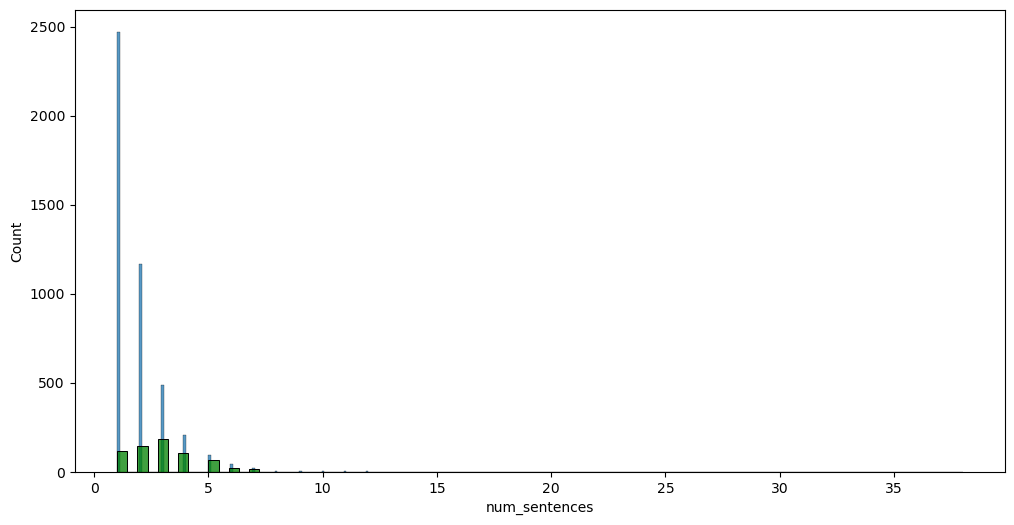

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='green')

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


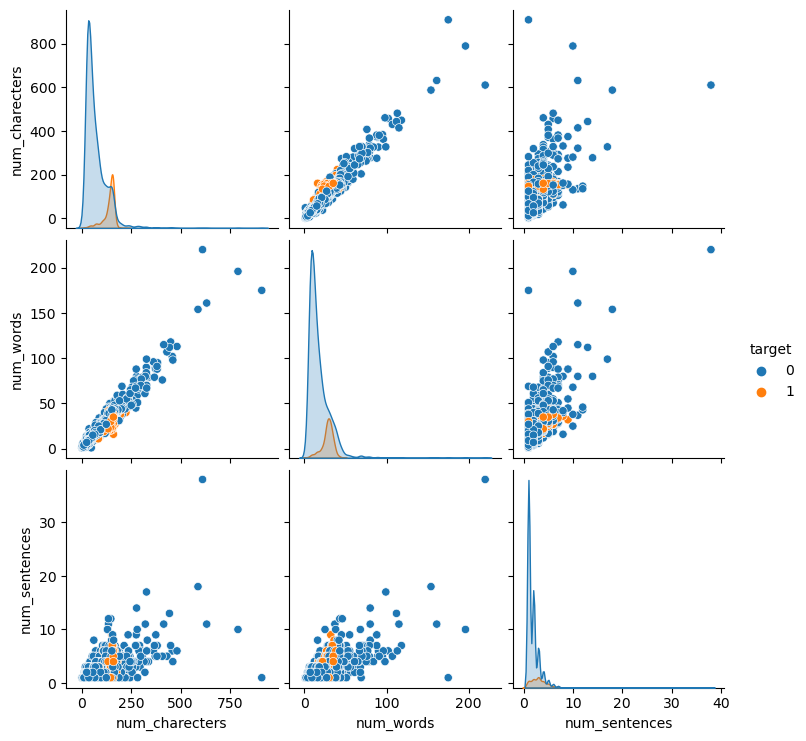

In [36]:
sns.pairplot(df,hue='target')

<Axes: >

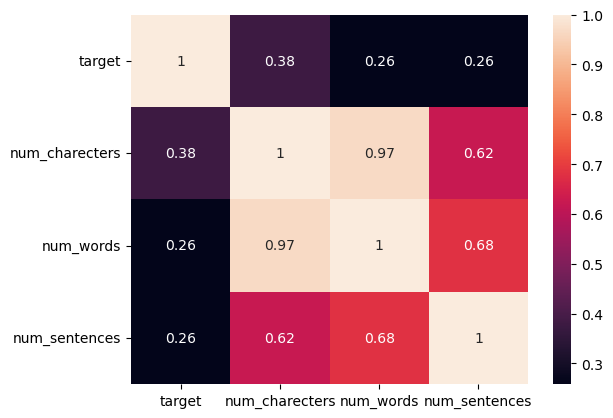

In [37]:
sns.heatmap(df[['target','num_charecters','num_words','num_sentences']].corr(),annot=True)

3.Data preprocessing

In [38]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [40]:
ps=PorterStemmer()

In [41]:
def transform_text(message):
    message = message.lower()
    message = nltk.word_tokenize(message)
    
    y = []
    for i in message:
        if i.isalnum():
            y.append(i)
    
    message = y[:]
    y.clear()
    
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    message = y[:]
    y.clear()
    
    for j in message:
        y.append(ps.stem(j))
    
            
    return " ".join(y)



In [42]:
transform_text("i am talking to you")

'talk'

In [43]:
df.sample(5)

,target,message,num_charecters,num_words,num_sentences
2258,0,Sad story of a Man - Last week was my b'day. M...,154,39,5
5224,0,\OH FUCK. JUSWOKE UP IN A BED ON A BOATIN THE ...,112,31,6
3356,0,"Brainless Baby Doll..:-D;-), vehicle sariyag d...",67,16,1
3800,0,"It's ok, at least armand's still around",39,10,1
5372,0,"Ok., is any problem to u frm him? Wats matter?",46,13,2


In [44]:
df['transform_text']=df['message'].apply(transform_text)

In [45]:
df.head()

,target,message,num_charecters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar then Joking wif u oni,30,7,1,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 393.8 kB/s eta 0:00:01
   ------------------- -------------------- 143.4/300.2 kB 1.2 MB/s eta 0:00:01
   ------------------------- -------------- 194.6/300.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.4 MB/s eta 0:00:00


In [47]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10)

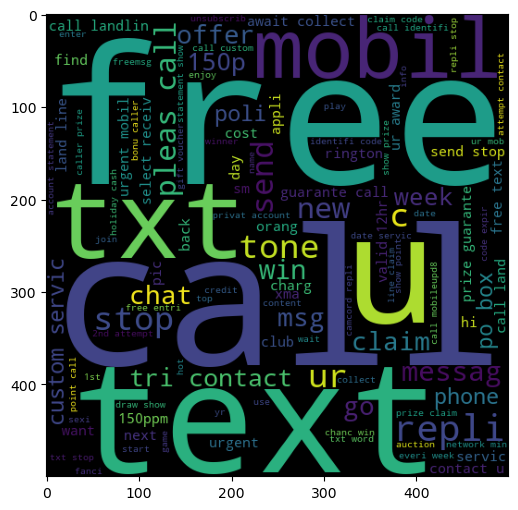

In [48]:
#spam messages display
spam_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

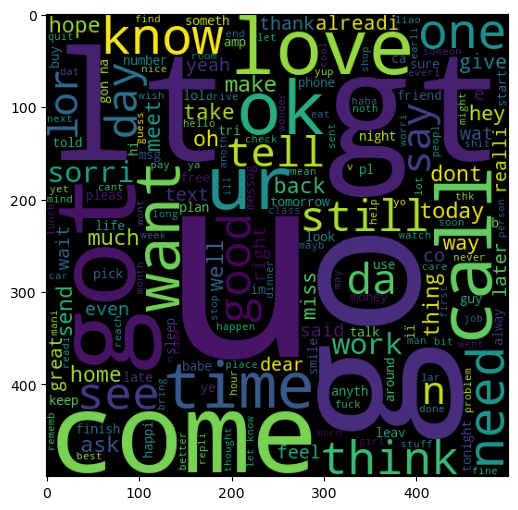

In [49]:
#ham messages display
ham_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [50]:
df.sample(5)

,target,message,num_charecters,num_words,num_sentences,transform_text
2096,0,I'm done...,11,4,1,done
4277,0,I've reached home finally...,28,6,1,reach home final
3042,0,Your bill at 3 is å£33.65 so thats not bad!,43,11,1,bill 3 that bad
1057,0,Ard 515 like dat. Y?,20,7,2,ard 515 like dat
5319,0,Kothi print out marandratha.,28,5,1,kothi print marandratha


In [51]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    
len(spam_corpus)

9959

In [52]:
from collections import Counter

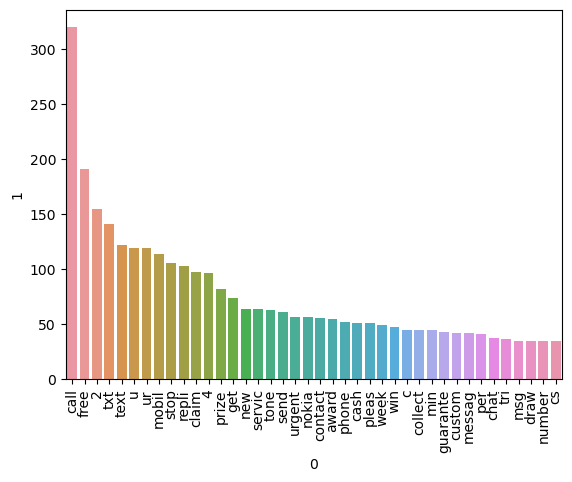

In [53]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(40))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(40))[1])
plt.xticks(rotation='vertical')
plt.show()

In [54]:
ham_corpus=[]
for msg in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

35758

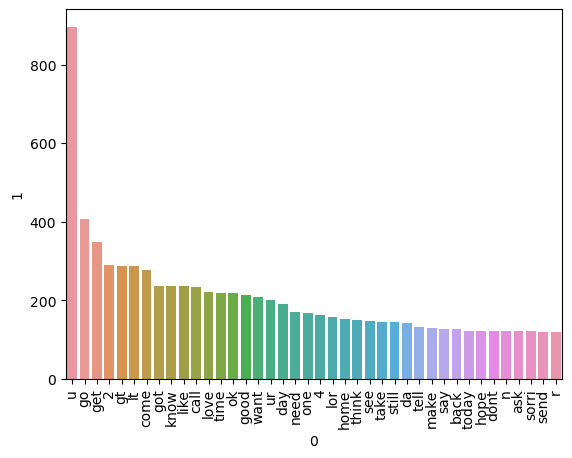

In [55]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(40))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(40))[1])
plt.xticks(rotation='vertical')
plt.show()

4.Model Building

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [57]:
x=tfidf.fit_transform(df['transform_text']).toarray()

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [59]:
x.shape

(5171, 3000)

In [60]:
y=df['target'].values

In [61]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [65]:
gnb=GaussianNB()
mnb=MultinomialNB()

In [66]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8714975845410629
[[792 111]
 [ 22 110]]
0.497737556561086


In [67]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.978743961352657
[[897   6]
 [ 16 116]]
0.9508196721311475


Importing Pickle

In [68]:
import pickle
pickle.dump(tfidf,open('tfidfvectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))